In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
# Define Functions to use throughout notebook
def do_regression(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    print("Coefficients:\n",regression.coef_)
    print("\nIntercept:",regression.intercept_)
    print("\nR^2 Value:",regression.score(X,Y))

def show_skew(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    predicted = regression.predict(X).ravel()
    actual = Y
    residual = actual - predicted
    f = plt.figure(figsize=(10,5))
    plt.subplot(131)
    sns.distplot(residual,bins=50)
    plt.title('Residual Counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.subplot(132)
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()    
    
def get_scree(df):
    X = StandardScaler().fit_transform(df)
    Xt = X.T
    Cx = np.cov(Xt)
    eig_val_cov,eig_vec_cov = np.linalg.eig(Cx)
    print('''
    The Percentage of the data explained by each component can be seen below
    ''')
    print(eig_val_cov / sum(eig_val_cov))
    plt.plot(eig_val_cov)
    plt.title("SCREE PLOT",size=(20))
    plt.xlabel("Principal Component Number")
    plt.ylabel("Eigenvalues")
    plt.show()
    
def do_pca(df,N):
    sklearn_pca = PCA(n_components=N)
    Y_sklearn = sklearn_pca.fit_transform(df)
    return Y_sklearn

In [4]:
# Read in data 
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\FBI_Table_Drill\data.csv',skiprows=4)
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
# Check to see which columns contain NA values
df.isna().sum()

City                                        0
Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

In [6]:
# Drop columns with lots of NA values
df = df.drop(['Rape\n(revised\ndefinition)1','Arson3'],axis=1)
# Then drop other rows with NA values from dataframe
df =df.dropna()

In [7]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

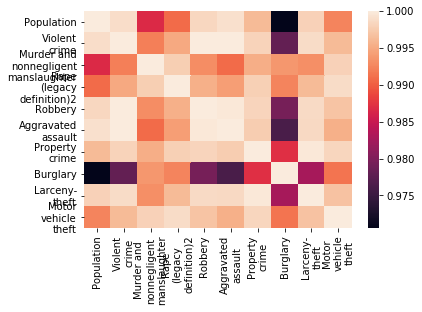

In [8]:
sns.heatmap(df.corr())

In [9]:
# Collect only columns of interest into new dataframe
data = pd.DataFrame(df)
data['Population_Squared'] = df.loc[:,'Population']**2
data[['Murder','Robbery','Property_Crime']] = df[['Murder and\nnonnegligent\nmanslaughter','Robbery','Property\ncrime']]

# Add binary indicators for murders and robberies
data['Murders_Occurring?'] = data.loc[:,'Murder'].apply(lambda x: x>=1)
data['Robbery_Occurring?'] = data.loc[:,'Robbery'].apply(lambda x: x>=1)

In [10]:
# Collect data for model and show results
Y = data['Property_Crime']
X = data[['Population','Population_Squared','Murders_Occurring?','Robbery_Occurring?']]
do_regression(X,Y)

Coefficients:
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]

Intercept: -109.57533562257231

R^2 Value: 0.9961247104988709


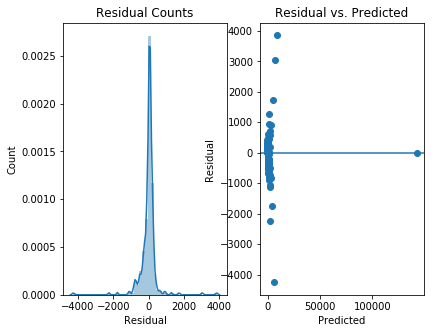

In [11]:
show_skew(X,Y)

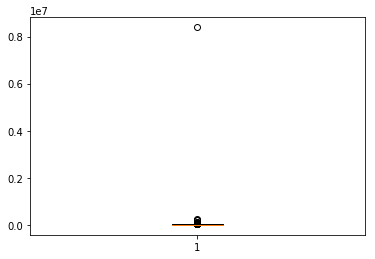

The upper and lower bounds for the whiskers on this plot are [3003.0, 18427.5]


In [12]:
# Results are most likely being skewed somehow - Look at distribution within population category
pop=plt.boxplot(data['Population'])
whiskers = [item.get_ydata()[0] for item in pop['whiskers']]
plt.show()
print("The upper and lower bounds for the whiskers on this plot are",whiskers)

Based on this plot there are some significant outliers in the population category that could be skewing the data

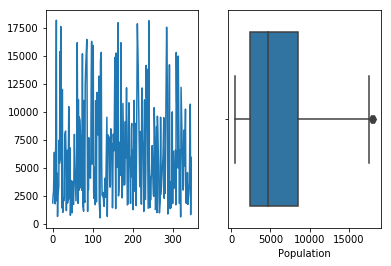

In [13]:
# Remove outliers and look at new distribution for population
data = data[data['Population']<18427.5]
plt.subplot(121)
plt.plot(data['Population'])
plt.subplot(122)
sns.boxplot(data['Population'])

In [14]:
# Specify new inputs for model
Y = data['Property_Crime']
X = data[['Population','Population_Squared','Murders_Occurring?','Robbery_Occurring?']]
do_regression(X,Y)

Coefficients:
 [7.78683296e-03 4.65664936e-07 6.04843856e+01 9.04709323e+01]

Intercept: -0.9426528243381824

R^2 Value: 0.5322850572465222


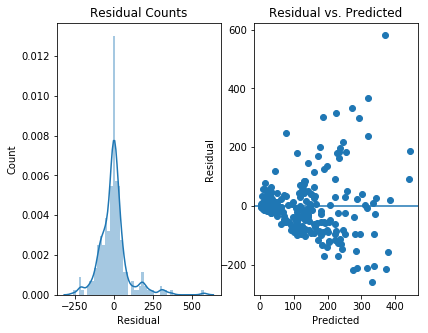

In [15]:
show_skew(X,Y)

In [16]:
# The residual vs predicted looks a little better now but R^2 value still low/ also only one variable really influenced equation ->  What if I include more categories into model

In [17]:
# Define additional binary identifiers for model
data['Larceny_Occurring?'] = data.loc[:,'Larceny-\ntheft'].apply(lambda x: x>=1)
data['Burglary_Occurring?'] = data.loc[:,'Burglary'].apply(lambda x: x>=1)
data['Car_Theft_Occurring?'] = data.loc[:,'Motor\nvehicle\ntheft'].apply(lambda x: x>=1)
data.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Population_Squared',
       'Murder', 'Property_Crime', 'Murders_Occurring?', 'Robbery_Occurring?',
       'Larceny_Occurring?', 'Burglary_Occurring?', 'Car_Theft_Occurring?'],
      dtype='object')

In [18]:
# Specify variables to use in model
Y = data['Property_Crime']
X = data[['Population','Population_Squared','Larceny_Occurring?','Burglary_Occurring?','Car_Theft_Occurring?','Robbery_Occurring?','Murders_Occurring?']]
do_regression(X,Y)

Coefficients:
 [6.37543986e-03 5.18910445e-07 9.10984239e-02 6.92146045e+00
 1.54426520e+01 8.67614028e+01 5.98987232e+01]

Intercept: -10.041311797979347

R^2 Value: 0.5348668899166271


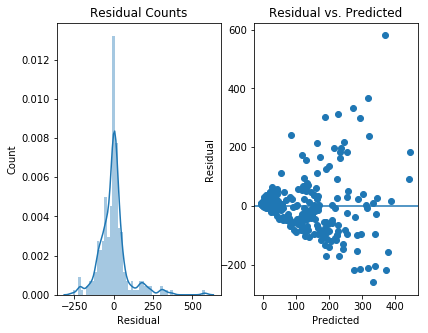

In [19]:
show_skew(X,Y)

In [20]:
# New model didnt really show improvement but showed that theres only really 3 variables that strongly influence data

In [21]:
# What if i use pca to compress these categories into theft/property damage?
pca_df = data[['Robbery','Burglary','Larceny-\ntheft']]


    The Percentage of the data explained by each component can be seen below
    
[0.84972967 0.09854793 0.0517224 ]


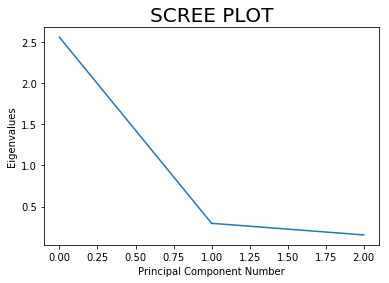

In [22]:
# All theft crimes (excluding car theft) could be represented fairly well with 1 component
get_scree(pca_df)

In [23]:
# Collect columns for new dataframe to feed into model
model_df = pd.DataFrame(data['Property\ncrime'])
model_df['THEFT'] = do_pca(pca_df,1)
model_df['Murder'] = data['Murders_Occurring?']
model_df['Population'] = data['Population']
model_df['Population_Squared'] = data.loc[:,'Population']**2

In [24]:
# Specify variables to use in model
Y = model_df['Property\ncrime']
X = model_df[['Population','Population_Squared','THEFT','Murder']]
do_regression(X,Y)

Coefficients:
 [-2.26190377e-05  5.90781957e-08  1.13836857e+00  9.33526585e+00]

Intercept: 115.62719180246215

R^2 Value: 0.9930300878958033


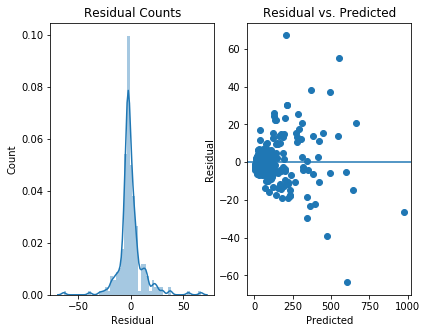

In [25]:
# Residual vs predicted still skewed but R^2 is very good and most of trend is explained by only 2 components here
show_skew(X,Y)

In [26]:
# What if I normalize all variables by population before building model? 
# Build new dataframe from original data 
data = pd.DataFrame(df['Population'])
data[['Murder','Robbery','Property_Crime','Assault','Burglary','Car_Theft','Larceny','Rape']]= df[['Murder and\nnonnegligent\nmanslaughter','Robbery','Property\ncrime','Aggravated\nassault','Burglary','Motor\nvehicle\ntheft','Larceny-\ntheft','Rape\n(legacy\ndefinition)2']]

In [27]:
# Calculate Per Capita values for all variables
data['Murder_PC'] = data.loc[:,'Murder'] / data.loc[:,'Population']
data['Robbery_PC'] = data.loc[:,'Robbery'] / data.loc[:,'Population']
data['PropCrime_PC'] = data.loc[:,'Property_Crime'] / data.loc[:,'Population']
data['Assault_PC'] = data.loc[:,'Assault'] / data.loc[:,'Population']
data['Burglary_PC'] = data.loc[:,'Burglary'] / data.loc[:,'Population']
data['CarTheft_PC'] = data.loc[:,'Car_Theft'] / data.loc[:,'Population']
data['Larceny_PC'] = data.loc[:,'Larceny'] / data.loc[:,'Population']
data['Rape_PC'] = data.loc[:,'Rape'] / data.loc[:,'Population']

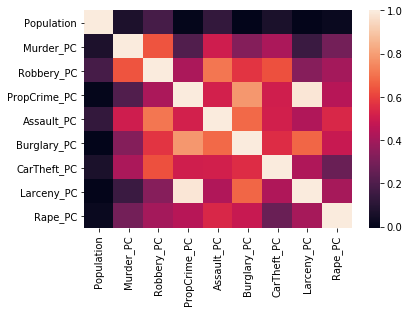

In [28]:
# Save all per capita values along with population and compare new correlations w/ heatmap
per_capita = data[['Population','Murder_PC','Robbery_PC','PropCrime_PC','Assault_PC','Burglary_PC','CarTheft_PC','Larceny_PC','Rape_PC']]
sns.heatmap(per_capita.corr())

In [29]:
# Collect varaibles for regression and print results
Y = per_capita['PropCrime_PC']
X = per_capita[['Murder_PC','Robbery_PC','Assault_PC','Burglary_PC','CarTheft_PC','Larceny_PC','Rape_PC']]
do_regression(X,Y)

Coefficients:
 [ 5.65127822e-14  5.32907052e-15 -5.77315973e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00 -3.94476118e-15]

Intercept: -1.3877787807814457e-17

R^2 Value: 1.0


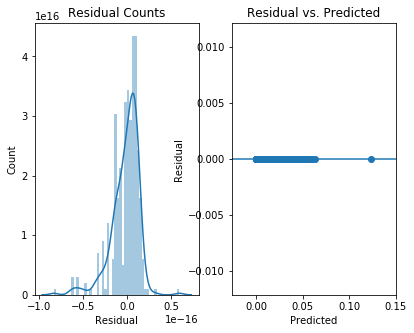

In [30]:
show_skew(X,Y)

In [31]:
# Model is now has 100% accuracy, but it looks llike theres only really 3 components that really matter

In [32]:
# Removing unnessecary variables
Y = per_capita['PropCrime_PC']
X = per_capita[['Burglary_PC','CarTheft_PC','Larceny_PC']]
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: -3.469446951953614e-18

R^2 Value: 1.0


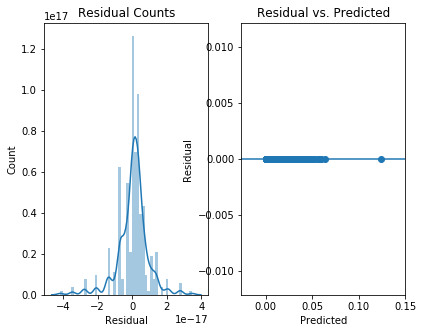

In [33]:
show_skew(X,Y)

Model still has pefect fit for data with less components, looks like these variables could just be being used to calculate property crime within the data

In [35]:
# Collect variables for Regression and show model 
Y = data['Property_Crime']
X = data[['Burglary','Car_Theft','Larceny']]
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: 1.1368683772161603e-12

R^2 Value: 1.0


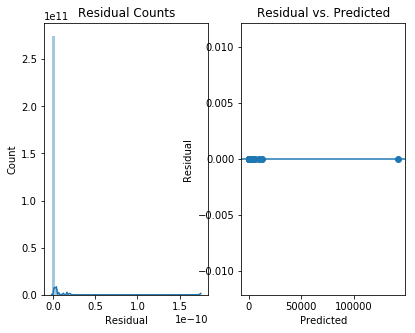

In [36]:
show_skew(X,Y)

This final model explains all of the variance in the data because the three variables used to predict property crime are obviously also the variables used to calculate property crime for the FBI datasets